In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alisultanshahi","key":"7a07f52a3824487b63a5eb25fa1a8bb5"}'}

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis
License(s): CC0-1.0
 82% 21.0M/25.7M [00:00<00:00, 68.5MB/s]
100% 25.7M/25.7M [00:00<00:00, 58.2MB/s]


In [ ]:
import zipfile
import os
# Now, we have to unzip it
with zipfile.ZipFile('dataco-smart-supply-chain-for-big-data-analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('Supply_chain_data')
print(os.listdir('Supply_chain_data'))

['DescriptionDataCoSupplyChain.csv', 'tokenized_access_logs.csv', 'DataCoSupplyChainDataset.csv']


In [ ]:
# Our encoding needs to be change, so we change it to 'latin1' encoding to read the CSV file
file_path = 'Supply_chain_data/DataCoSupplyChainDataset.csv'  # Adjust file name if necessary
data = pd.read_csv(file_path, encoding='latin1')

data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
# Checking missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Drop 'Product Description' as it is completely empty
data = data.drop(columns=['Product Description'])

# Handle other missing values, unkown instead of null
data['Customer Lname'] = data['Customer Lname'].fillna('Unknown')
data['Customer Zipcode'] = data['Customer Zipcode'].fillna('Unknown')
data['Order Zipcode'] = data['Order Zipcode'].fillna('Unknown')


Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64


In [31]:
# Change fomat of some clumns date columns to datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'], format='%m/%d/%Y %H:%M')
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')

In [33]:
file_path = 'C:/Users/darks/DataCoSupplyChainDataset.csv'
data.to_csv(file_path, index=False)
print(f"Dataset saved successfully as '{file_path}'")

Dataset saved successfully as 'C:/Users/darks/DataCoSupplyChainDataset.csv'


In [ ]:
# Summary statistics
print(data.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.623722                       1.374449   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000 

In [ ]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

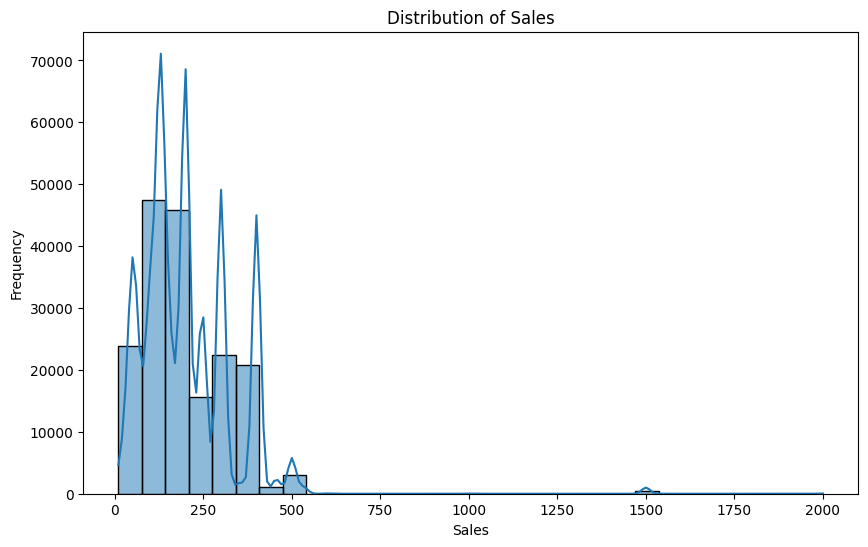

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


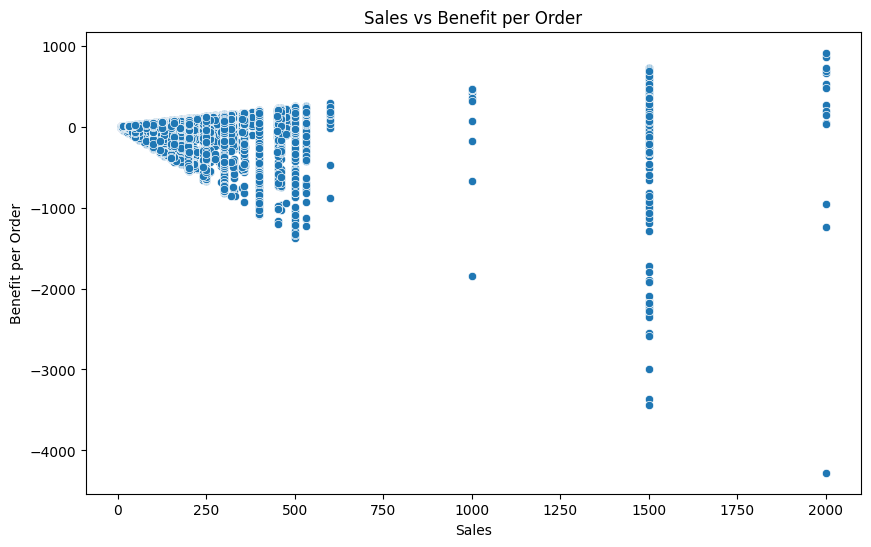

In [ ]:
# Scatter plot between Sales and Benefit per order
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Benefit per order', data=data)
plt.title('Sales vs Benefit per Order')
plt.xlabel('Sales')
plt.ylabel('Benefit per Order')
plt.show()


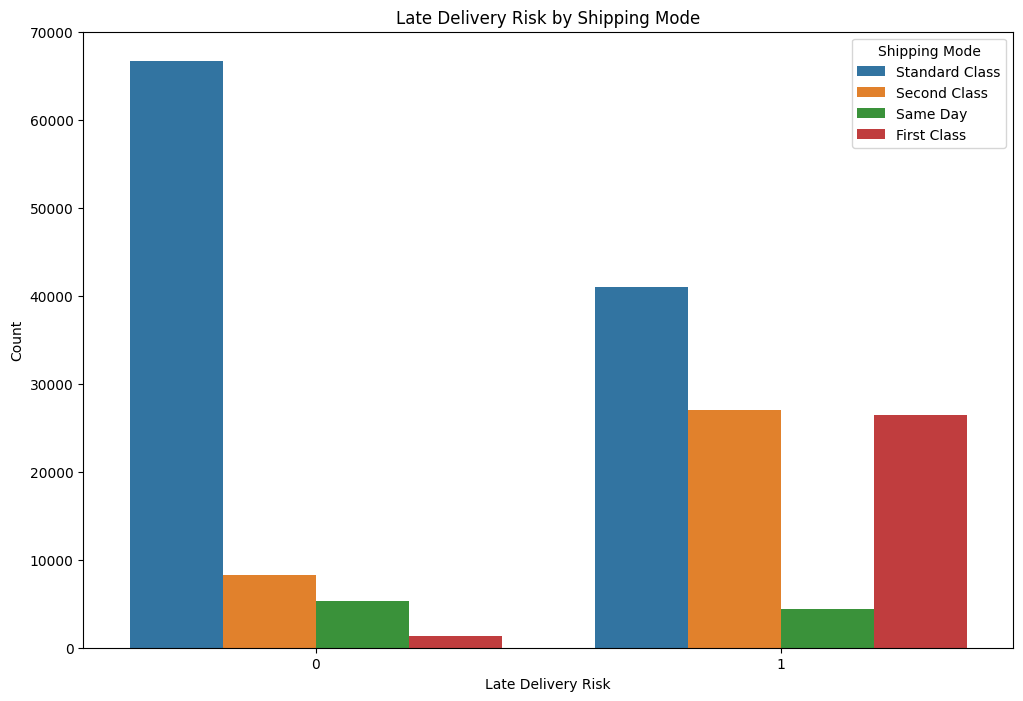

In [ ]:
# Count plot of Late Delivery Risk by Shipping Mode
plt.figure(figsize=(12, 8))
sns.countplot(x='Late_delivery_risk', hue='Shipping Mode', data=data)
plt.title('Late Delivery Risk by Shipping Mode')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.legend(title='Shipping Mode')
plt.show()


 want to have anothere column, by names of Delivered Date, whenever the delivery status is shipping on time, it needs to be not null and the date should be based on shipping mode

In [ ]:
print(data['Delivery Status'].value_counts())


Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


In [ ]:
def generate_delivered_date(row):
    shipping_date = row['shipping date (DateOrders)']
    shipping_mode = row['Shipping Mode']

    # Initialize delivered date as NaN
    delivered_date = np.nan

    # Set delivered date only if delivery status is "Shipping on time"
    if row['Delivery Status'] == 'Shipping on time':
        if shipping_mode == 'Standard Class':
            delivered_date = shipping_date + pd.Timedelta(days=np.random.randint(1, 10))
        elif shipping_mode == 'Second Class':
            delivered_date = shipping_date + pd.Timedelta(days=np.random.randint(1, 5))
        elif shipping_mode == 'Same Day':
            delivered_date = shipping_date + pd.Timedelta(hours=np.random.randint(1, 12))
        elif shipping_mode == 'First Class':  # Assuming First Class is also a mode
            delivered_date = shipping_date + pd.Timedelta(days=np.random.randint(1, 3))

    return delivered_date

# Apply the function row-wise to generate delivered dates
data['Delivered Date'] = data.apply(generate_delivered_date, axis=1)

# Display the updated DataFrame
print(data)

            Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
0       

In [ ]:
print(data['Delivered Date'].value_counts())

Delivered Date
2016-09-24 05:36:00    5
2017-07-30 11:39:00    4
2015-08-22 11:57:00    4
2017-04-16 22:08:00    4
2015-02-28 09:02:00    4
                      ..
2017-01-25 08:46:00    1
2016-07-31 01:50:00    1
2016-07-28 01:50:00    1
2016-05-24 00:00:00    1
2016-01-29 03:40:00    1
Name: count, Length: 27038, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is my DataFrame with the required columns
# Feature selection
X = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk']]
y = data['Delivery Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.98
                   precision    recall  f1-score   support

 Advance shipping       0.96      1.00      0.98      8282
    Late delivery       1.00      1.00      1.00     19797
Shipping canceled       1.00      0.58      0.74      1558
 Shipping on time       0.95      1.00      0.98      6467

         accuracy                           0.98     36104
        macro avg       0.98      0.90      0.92     36104
     weighted avg       0.98      0.98      0.98     36104



Accuracy: Overall accuracy of the model is 0.98, which means it correctly predicts 98% of the cases across all classes. This is a high accuracy rate, indicating the model performs well in general.
Advance shipping:

Precision: 0.96
When the model predicts "Advance shipping", it is correct 96% of the time.
Recall: 1.00
The model identifies 100% of actual "Advance shipping" instances.
F1-Score: 0.98
The harmonic mean of precision and recall is 0.98, indicating high overall performance for this class.
Late delivery:

Precision: 1.00
Precision is perfect (1.00), meaning all predictions for "Late delivery" are correct.
Recall: 1.00
The model correctly identifies all instances of actual "Late delivery".
F1-Score: 1.00
F1-Score is perfect (1.00), showing excellent performance for this class.
Shipping canceled:

Precision: 1.00
The model is very precise (1.00) when predicting "Shipping canceled".
Recall: 0.58
However, recall is 0.58, indicating that it misses 42% of actual "Shipping canceled" instances.
F1-Score: 0.74
The F1-Score is 0.74, which is good but lower compared to other classes, suggesting room for improvement in recall.
Shipping on time:

Precision: 0.95
Precision for "Shipping on time" is 0.95, meaning 95% of the predictions for this class are correct.
Recall: 1.00
The model identifies all actual "Shipping on time" instances.
F1-Score: 0.98
The F1-Score is 0.98, indicating high performance similar to "Advance shipping".

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection
X = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk']]
y = data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 17341.34


the Mean Squared Error of 17341.34 provides a quantitative measure of the average squared difference between predicted and actual values in my regression model. Lower values indicate better predictive accuracy, while higher values suggest more substantial prediction errors.

In [ ]:
from sklearn.linear_model import LogisticRegression

X = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk']]
y = (data['Delivery Status'] == 'Shipping on time').astype(int)  # Convert to binary label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     29637
           1       0.84      1.00      0.91      6467

    accuracy                           0.97     36104
   macro avg       0.92      0.98      0.95     36104
weighted avg       0.97      0.97      0.97     36104



Almost same as Decision Tree

Let's Make 4 tables out of dataset, to start working in mysql
*   Customer table
*   Orders table
*   Sales table
*   Product table

In [20]:
import pandas as pd
path ='C:/Users/darks/DataCoSupplyChainDataset.csv'
data = pd.read_csv(path, encoding='latin1')

In [21]:
customer_columns = ['Customer Id', 'Customer Fname', 'Customer Lname', 'Customer Email',
                    'Customer Password', 'Customer Segment', 'Customer City', 'Customer State',
                    'Customer Country', 'Customer Street', 'Customer Zipcode', 'Latitude', 'Longitude']
customers = data[customer_columns].drop_duplicates().reset_index(drop=True)

In [22]:
orders_columns = ['Order Id', 'Order Customer Id', 'order date (DateOrders)', 'Order Region',
                  'Order City', 'Order State', 'Order Country', 'Order Zipcode', 'Order Status',
                  'Shipping Mode', 'Days for shipping (real)', 'Days for shipment (scheduled)',
                  'Late_delivery_risk', 'shipping date (DateOrders)']
orders = data[orders_columns].drop_duplicates().reset_index(drop=True)


In [23]:
sales_columns = ['Order Id', 'Order Item Id', 'Order Item Cardprod Id', 'Product Card Id',
                 'Product Category Id', 'Product Name', 'Product Price',
                 'Order Item Quantity', 'Sales per customer', 'Order Item Product Price',
                 'Order Item Total', 'Order Item Discount', 'Order Item Discount Rate',
                 'Order Item Profit Ratio', 'Order Profit Per Order']
sales = data[sales_columns].drop_duplicates().reset_index(drop=True)


In [24]:
product_columns = ['Product Card Id', 'Category Id', 'Category Name', 'Product Image']
products = data[product_columns].drop_duplicates().reset_index(drop=True)


In [19]:
customers.to_csv('customers.csv', index=False)
orders.to_csv('orders.csv', index=False)
sales.to_csv('sales.csv', index=False)
products.to_csv('products.csv', index=False)

AttributeError: 'str' object has no attribute 'to_csv'

*Now*, we want to export our .csv files

In [25]:
customers.to_csv('C:/Users/darks/customers.csv', index=False)
orders.to_csv('C:/Users/darks/orders.csv', index=False)
sales.to_csv('C:/Users/darks/sales.csv', index=False)
products.to_csv('C:/Users/darks/products.csv', index=False)

From this point, I had 3 solution for adding my tables into sql dataserver, use cloud base sql servers like google cloud sql or etc, or I download my dataset and input them manually into sql dataserver OR I load these .CSV files into jupyter then run it locally. I choosed the third way.

In [34]:
from sqlalchemy import create_engine
import pandas as pd

# Database connection details
user = 'root'
password = 'Ali1375'
host = 'localhost'
port = 3306
database = 'Supply_Chain_project'

# File paths
customers_file = 'C:/Users/darks/customers.csv'
orders_file = 'C:/Users/darks/orders.csv'
sales_file = 'C:/Users/darks/sales.csv'
products_file = 'C:/Users/darks/products.csv'

# Table names
customers_table = 'customers'
orders_table = 'orders'
sales_table = 'sales'
products_table = 'products'

# Column names
customers_columns = ['Customer Id', 'Customer Fname', 'Customer Lname', 'Customer Email',
                     'Customer Segment', 'Customer City', 'Customer State',
                     'Customer Country', 'Customer Street', 'Customer Zipcode', 'Latitude', 'Longitude']
orders_columns = ['Order Id', 'Order Customer Id', 'order date (DateOrders)', 'Order Region',
                  'Order City', 'Order State', 'Order Country', 'Order Zipcode', 'Order Status',
                  'Shipping Mode', 'Days for shipping (real)', 'Days for shipment (scheduled)',
                  'Late_delivery_risk', 'shipping date (DateOrders)']
sales_columns = ['Order Id', 'Order Item Id', 'Order Item Cardprod Id', 'Product Card Id',
                 'Product Category Id', 'Product Name', 'Product Price',
                 'Order Item Quantity', 'Sales per customer', 'Order Item Product Price',
                 'Order Item Total', 'Order Item Discount', 'Order Item Discount Rate',
                 'Order Item Profit Ratio', 'Order Profit Per Order']
products_columns = ['Product Card Id', 'Category Id', 'Category Name', 'Product Image']

# Creating the connection engine
try:
    db = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')
    print("Connection to MySQL DB successful")
except Exception as e:
    print(f"Error connecting to MySQL DB: {e}")

# Function to load CSV and clean data, and convert date format
def load_and_clean_data(file_path, columns):
    df = pd.read_csv(file_path, usecols=columns).drop_duplicates().reset_index(drop=True)
    
    # Convert date columns to MySQL-compatible format
    for col in ['order date (DateOrders)', 'shipping date (DateOrders)']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col]).dt.strftime('%Y-%m-%d %H:%M:%S')
    
    return df

# Loading and cleaning data
try:
    customers = load_and_clean_data(customers_file, customers_columns)
    orders = load_and_clean_data(orders_file, orders_columns)
    sales = load_and_clean_data(sales_file, sales_columns)
    products = load_and_clean_data(products_file, products_columns)

    # Inserting data into the MySQL tables
    customers.to_sql(customers_table, con=db, if_exists='replace', index=False)
    orders.to_sql(orders_table, con=db, if_exists='replace', index=False)
    sales.to_sql(sales_table, con=db, if_exists='replace', index=False)
    products.to_sql(products_table, con=db, if_exists='replace', index=False)

    print("Data has been imported into the respective tables successfully")

except FileNotFoundError as e:
    print(f'File not found: {e}')
except Exception as e:
    print(f'Error importing data into MySQL DB: {e}')
finally:
    if 'db' in locals():
        db.dispose()  # Close the database connection


Connection to MySQL DB successful
Data has been imported into the respective tables successfully
